In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_length, stratify=fish_target, random_state=42)

print('train_input.shape: ', train_input.shape,
'test_input.shape', test_input.shape)

print('train_target: ', train_target)
print('test_target: ', test_target)

train_input.shape:  (36, 2) test_input.shape (13, 2)
train_target:  [29.7, 12.2, 33.0, 11.3, 39.5, 29.0, 36.0, 36.0, 31.0, 35.0, 37.0, 11.2, 34.5, 12.0, 29.0, 33.0, 30.7, 38.5, 33.5, 14.3, 31.5, 25.4, 9.8, 32.0, 10.5, 33.5, 10.6, 35.0, 32.0, 35.0, 13.0, 30.0, 32.0, 15.0, 30.0, 41.0]
test_target:  [11.0, 11.8, 29.7, 11.8, 26.5, 12.4, 34.0, 34.0, 38.5, 35.0, 26.3, 31.0, 41.0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [21]:
score_data=[]
for n in range(5, 50):
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(fish_data, fish_target)
    score_data.append(kn.score(fish_data, fish_target))

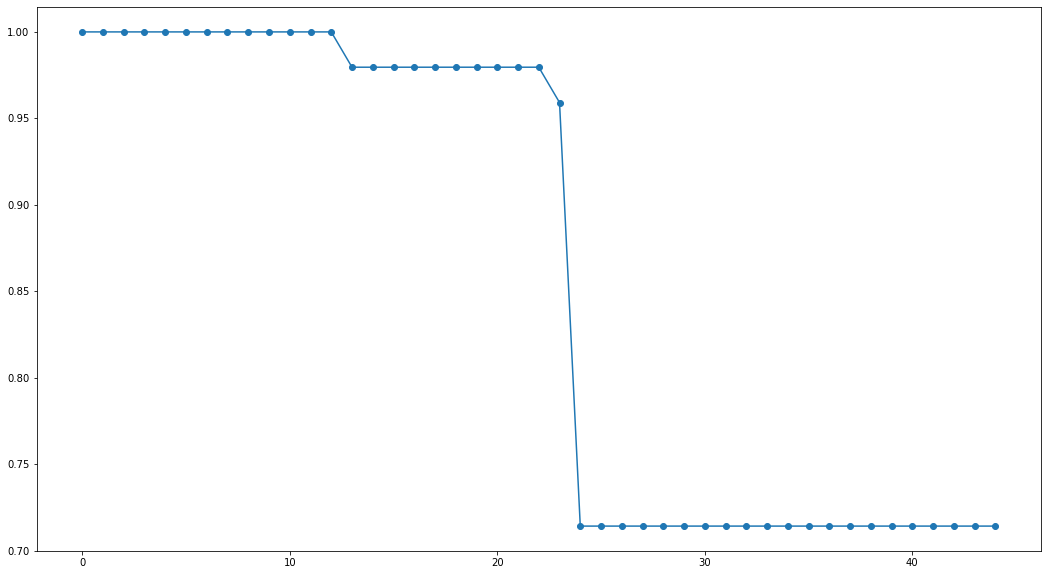

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plt.plot(score_data, marker = "o")